# Predicting heart disease using ML
This notebook looks into using various Python-based ML and data science tools in an attempt to build a ML model capable of predictingwhether or not a patient has or doesn't have a heart disease.

We're goint to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_score, f1_score, classification_report, recall_score, roc_curve

In [5]:
# Load data
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.shape

(303, 14)

## Data exploration
The goal here is to find out mode about the data and know everything about the data we are working with.

1. What questions are we trying to solve?
2. What kind of data do we have?
3. What's missing from the data and how to deal with it?
4. Where are the outliersand why should we care about em?
5. How can you add, change or remove features to get more from our data?

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

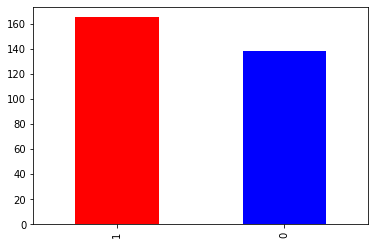

In [10]:
df["target"].value_counts().plot(kind = "bar", color = ["red", "blue"]);

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease frequency according to sex

In [14]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [15]:
# Compare target to sex
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


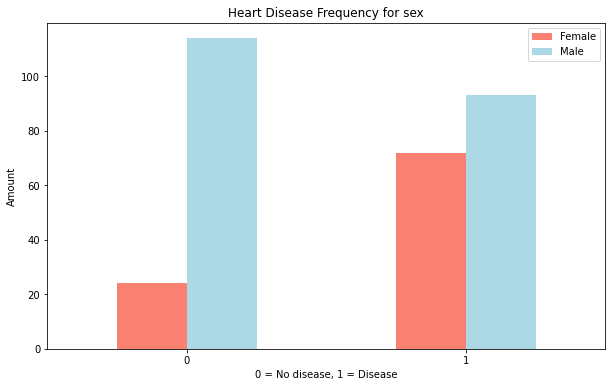

In [16]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind = "bar", figsize = (10, 6), color = ["salmon", "lightblue"]);
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0);

### Age vs max heart rate

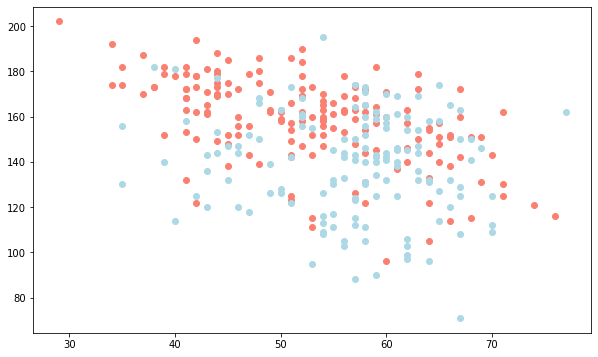

In [17]:
# Creating another figure
plt.figure(figsize = (10, 6))
# Scatter with positive examples
plt.scatter(df.age[df["target"] == 1], df.thalach[df.target == 1], c = "salmon");
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c = "lightblue");

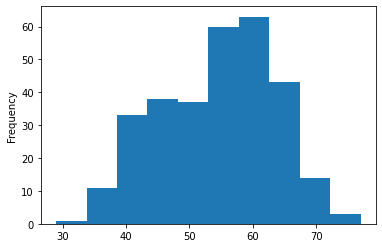

In [18]:
df.age.plot.hist();

In [19]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


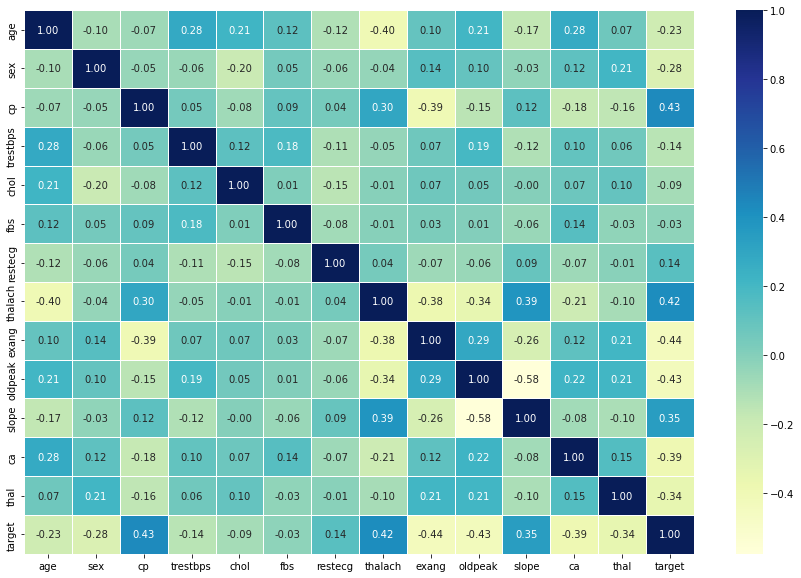

In [20]:
# Let's make it visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix, annot = True, linewidths = 0.5, fmt = ".2f", cmap = "YlGnBu")


## 5. Modelling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Split the adat into X and y
X = df.drop("target", axis = 1)
y = df["target"]
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)


In [23]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


We're going to try three different ML models:
1. Logistic Regression
2. K-nearest classifier
3. RandomForestClassifier

In [24]:
# Put models in a dictionary
models = {"LogisticRegression": LogisticRegression(), "KNN": KNeighborsClassifier(), 
         "RandomForestClassifier": RandomForestClassifier()}
# Creat a function to fit and score the models:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    fits and evaluates given ML models
    """
    np.random.seed(42)
    # Dict to keep model scores
    model_scores = {}
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        model_scores[name] = score
        print(f"{name}: {score}")
    return model_scores
        
        

In [25]:
model_score = fit_and_score(models = models, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)


C:\Users\abhis\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: 0.8852459016393442
KNN: 0.6885245901639344
RandomForestClassifier: 0.8360655737704918


In [26]:
model_score

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

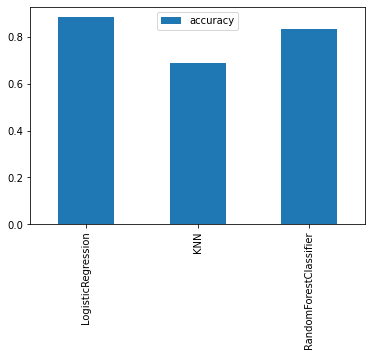

In [27]:
model_compare = pd.DataFrame(model_score, index = ["accuracy"])
model_compare.T.plot(kind = "bar");

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classsification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning

In [28]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [29]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

0.7540983606557377


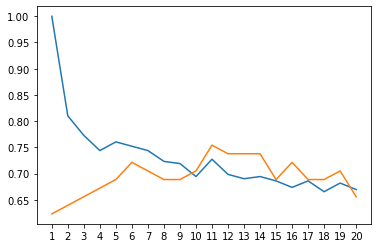

In [31]:
plt.plot(neighbors, train_scores, label = "train score");
plt.plot(neighbors, test_scores, label = "test scores");
plt.xticks(np.arange(1, 21, 1));
print(max(test_scores))

* Hence we discard KNN as it has a lower score than the RandomForest and the logisticRegression

### Now we will use RandomizedSearchCV
We are going to tune our LogisticRegression and our RandomForestClasssifier models

In [32]:
# Create a hyperparameter grid for the logistic regression
log_reg_grid = {"C": np.logspace(-4, 4, 50), "solver": ["liblinear"]}

In [33]:
np.logspace(-4, 4, 50)

array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511374e-02, 1.26485522e-01,
       1.84206997e-01, 2.68269580e-01, 3.90693994e-01, 5.68986603e-01,
       8.28642773e-01, 1.20679264e+00, 1.75751062e+00, 2.55954792e+00,
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])

In [34]:
r_grid = {"n_estimators": np.arange(10, 1000, 50), 
          "max_depth": [None, 3, 5, 10],
         "min_samples_split": np.arange(2, 20, 2),
         "min_samples_leaf": np.arange(1, 20, 2),
         }

In [35]:
r_grid

{'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
        660, 710, 760, 810, 860, 910, 960]),
 'max_depth': [None, 3, 5, 10],
 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])}

In [36]:
# Tune logistics 
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions = log_reg_grid, cv = 5, n_iter = 20, verbose = True)
rs_log_reg.fit(X_train, y_train)
#rs_log_reg.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-0...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [37]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.12648552168552957}

Now we have tuned, let's do the same for RandomForestClassifier

In [38]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions = r_grid,  cv = 5, n_iter = 20, verbose = True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [39]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [40]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [41]:
model_score

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

## Hyperparameters using GridSearchCV
We will use the logisticsReg model as it gives us the best results

In [42]:
log_reg_grid = {"C": np.logspace(-4, 4, 50),
               "solver": ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid = log_reg_grid, cv = 5, verbose = True)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.685113...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [43]:
gs_log_reg.best_params_

{'C': 0.18420699693267145, 'solver': 'liblinear'}

In [44]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned model

* ROC curve and AUC curve
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [45]:
y_preds = gs_log_reg.predict(X_test)

In [59]:
from sklearn.metrics import plot_roc_curve, precision_score
# Plot ROC curve
def plot_roc(esti, X_t, y_t):
    plot_roc_curve(esti, X_t, y_t)

In [50]:
c_mat = confusion_matrix(y_test, y_preds)

In [72]:
import seaborn as sns
def plot_con_mat(y_t, y_p):
    sns.set(font_scale = 4)
    fig, ax = plt.subplots(figsize = (5, 5))
    c_mat = confusion_matrix(y_t, y_p)
    ax = sns.heatmap(c_mat, annot = True, cbar = False);
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

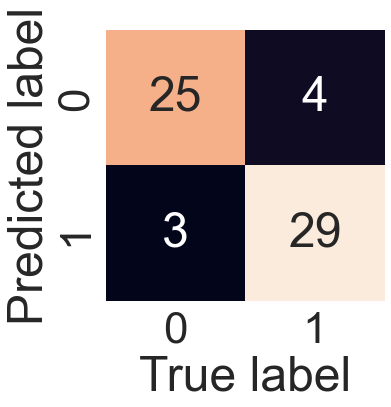

In [73]:
plot_con_mat(y_test, y_preds)

In [75]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [87]:
from sklearn.model_selection import cross_val_score
lst = ["accuracy", "precision", "recall", "f1"]
c = []
m = []
for i in range(len(lst)):
    c.append(cross_val_score(gs_log_reg, X, y, scoring = lst[i]))
    print(f"Cross validated {lst[i]} is :{c[i]}")
    m.append(np.mean(c[i]))
    print(f"mean cv {lst[i]} is:{np.mean(c[i])}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Cross validated accuracy is :[0.83606557 0.90163934 0.86885246 0.86666667 0.75      ]
mean cv accuracy is:0.8446448087431694
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Cross validated precision is :[0.7804878  0.88571429 0.85714286 0.85714286 0.725     ]
mean cv precision is:0.8210975609756097
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitt

In [88]:
m

[0.8446448087431694,
 0.8210975609756097,
 0.9212121212121213,
 0.8671712002090729]

In [90]:
cv_metrics = pd.DataFrame({"Accuracy": m[0], "Prcision": m[1], "recall": m[2], "f1 score": m[3]}, index = [0])

In [91]:
cv_metrics

,Accuracy,Prcision,recall,f1 score
0,0.844645,0.821098,0.921212,0.867171


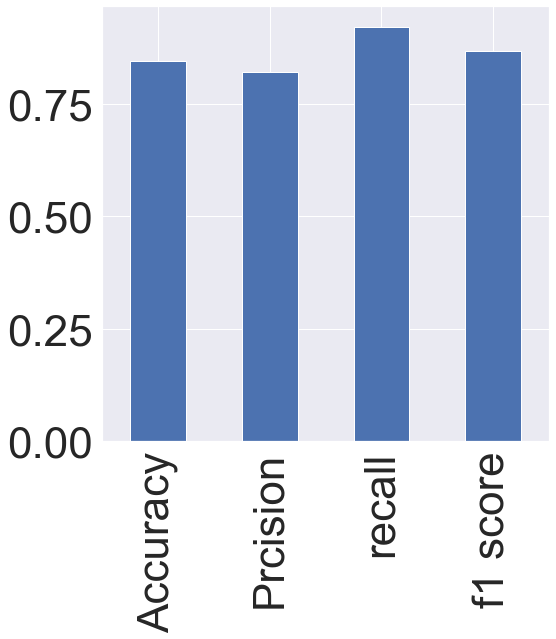

In [96]:
cv_metrics.T.plot.bar(legend = False, figsize = (8, 8));


# Feature importance

It is another way of asking, what features contributed most to the outcomes of our model and how did they contribute?

In [98]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [99]:
gs_log_reg.best_params_

{'C': 0.18420699693267145, 'solver': 'liblinear'}

In [100]:
clf = LogisticRegression(C = 0.18420699693267145, solver = "liblinear")

In [101]:
clf

LogisticRegression(C=0.18420699693267145, solver='liblinear')

In [102]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.18420699693267145, solver='liblinear')

In [103]:
clf.coef_

array([[ 0.00274534, -0.82466189,  0.64946587, -0.01155522, -0.00162953,
         0.04067028,  0.29769479,  0.02448922, -0.58200187, -0.56321728,
         0.43464708, -0.62480489, -0.66201556]])

In [104]:
# Match coef's of features to columns

In [108]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

In [109]:
feature_dict

{'age': 0.0027453388912099938,
 'sex': -0.8246618925895026,
 'cp': 0.6494658734112999,
 'trestbps': -0.011555217651027324,
 'chol': -0.0016295280907753955,
 'fbs': 0.040670283379110286,
 'restecg': 0.2976947920367581,
 'thalach': 0.024489217581175098,
 'exang': -0.582001869690591,
 'oldpeak': -0.5632172839667977,
 'slope': 0.4346470784060709,
 'ca': -0.6248048894708255,
 'thal': -0.662015563657806}

In [111]:
# Visualize feature importamce
feature_df = pd.DataFrame(feature_dict, index = [0])

In [112]:
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.002745,-0.824662,0.649466,-0.011555,-0.00163,0.04067,0.297695,0.024489,-0.582002,-0.563217,0.434647,-0.624805,-0.662016


<AxesSubplot:>

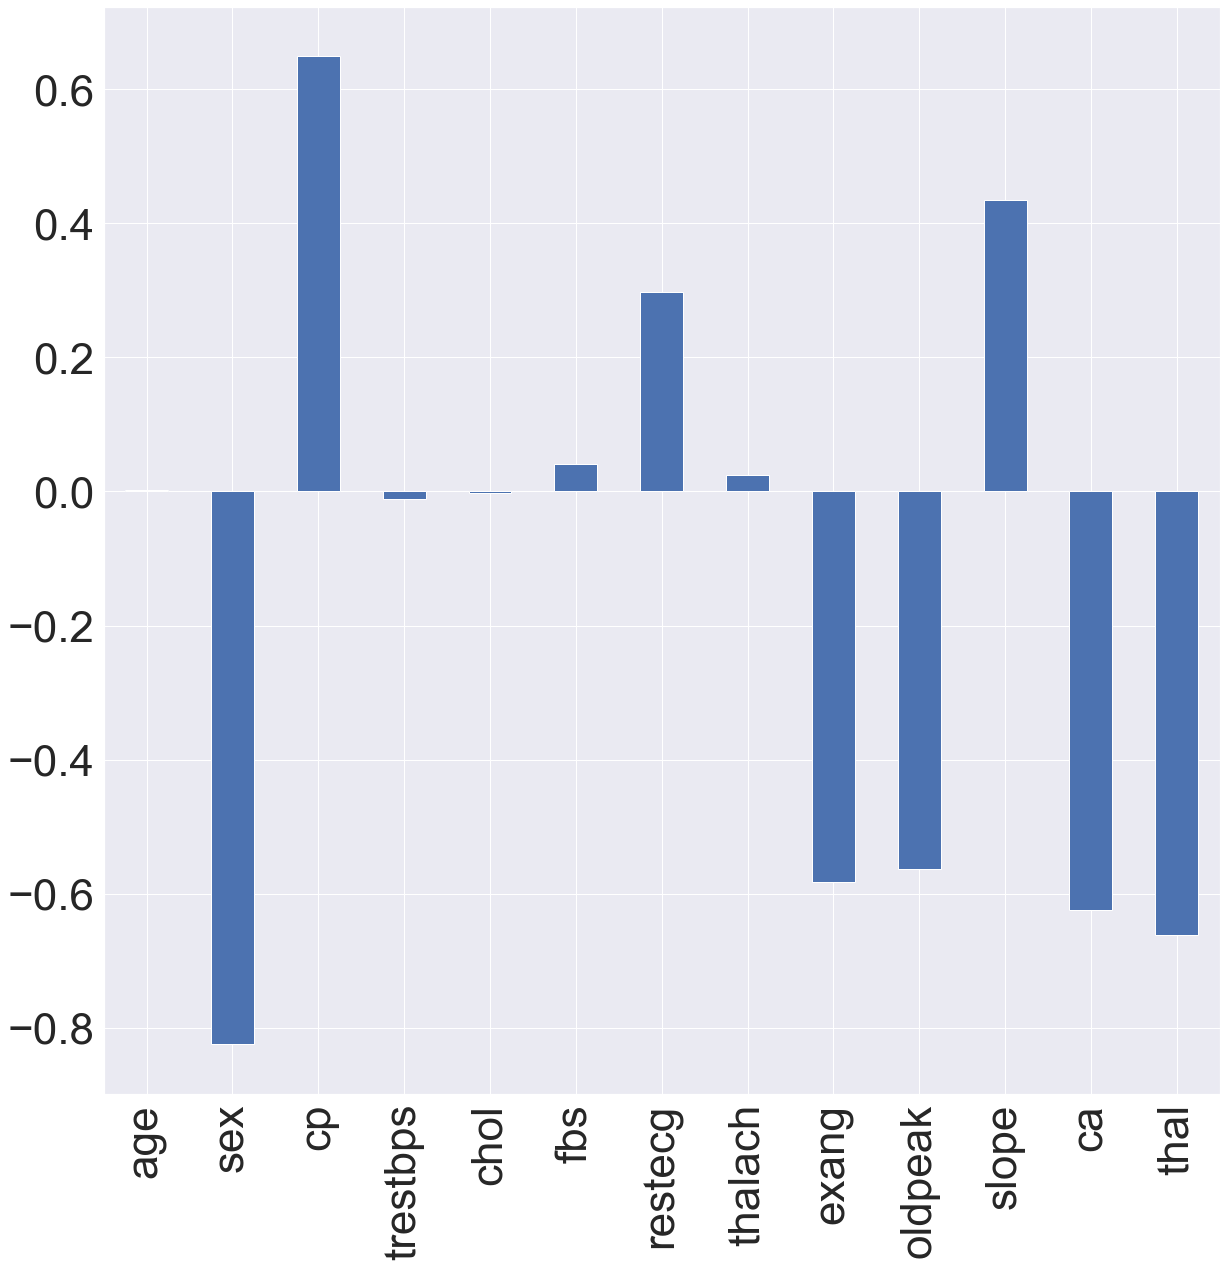

In [117]:
feature_df.T.plot.bar(legend = False, figsize = (20, 20))

In [118]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


## 6. Experimentation
Since we have not achieved our target of 95%, we can probably do the following:
1. Collect more data
2. Could try a better model? CatBoost or XGBoost
3. Could we imporve the current model by tuning hyperparameters

In [122]:
#Let's save our model
from joblib import dump, load
dump("clf", "heart-disease-model")

['heart-disease-model']

In [123]:
m = load("heart-disease-model")

In [124]:
m

'clf'